In [7]:
import os


os.chdir("C:/eCommerce_Project")  # folder 
print(os.getcwd())  # Checking the working directory


C:\eCommerce_Project


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [18]:
# Loading the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Checking the first few rows of each dataset
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [19]:
# Checking for missing values in the datasets
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Checking for duplicate rows
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [22]:
# Duplicates handling
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Handling missing values (impute or drop)
customers.ffill(inplace=True)  # Forward fill for customer data
products.ffill(inplace=True)   # Forward fill for product data
transactions.fillna(0, inplace=True)  # Impute missing transaction data with 0


In [23]:
# Basic statistics for numerical columns
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


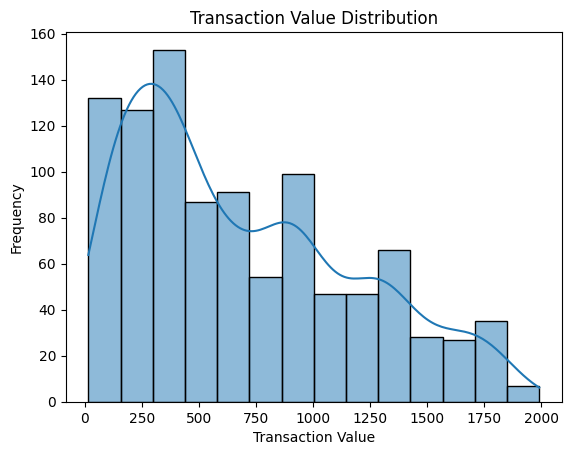

In [27]:
sns.histplot(transactions['TotalValue'], kde=True)
plt.title('Transaction Value Distribution')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()



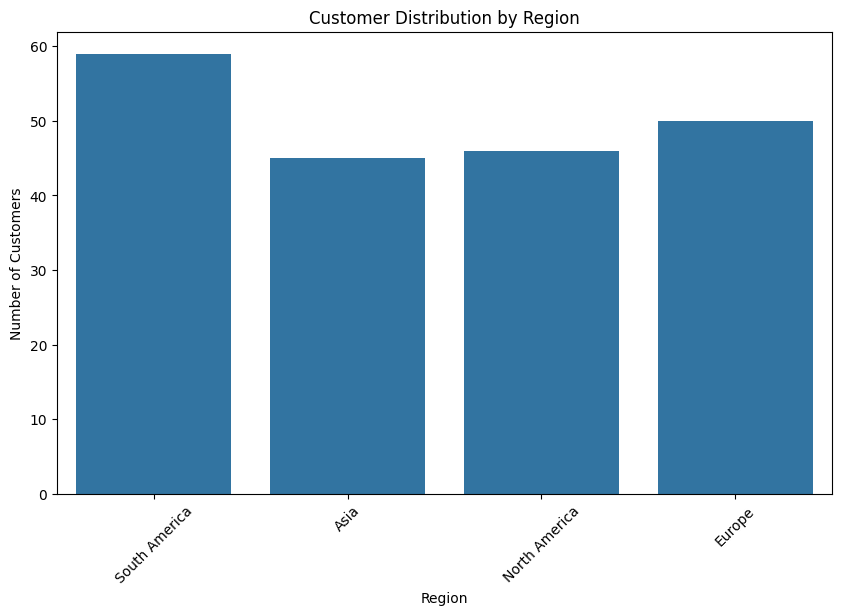

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


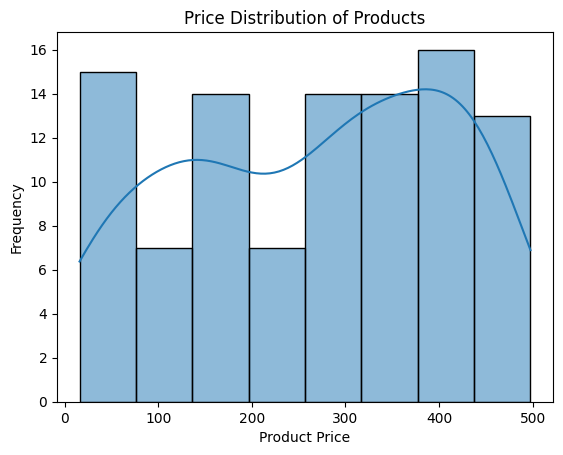

In [29]:
sns.histplot(products['Price'], kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()


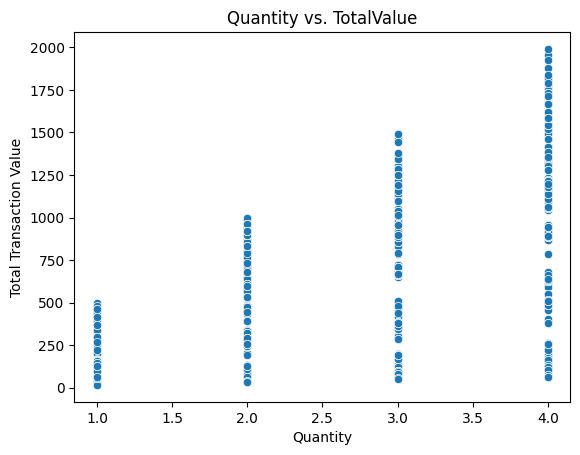

In [30]:
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue')
plt.title('Quantity vs. TotalValue')
plt.xlabel('Quantity')
plt.ylabel('Total Transaction Value')
plt.show()


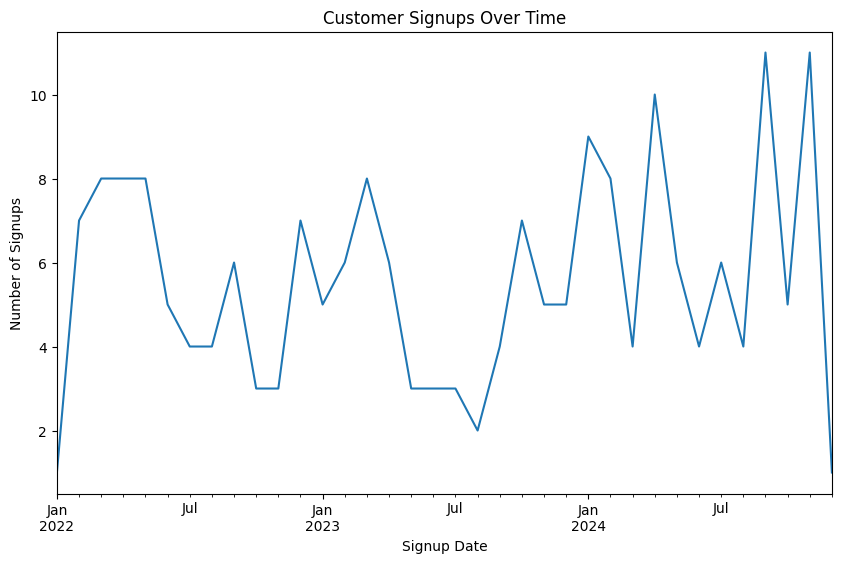

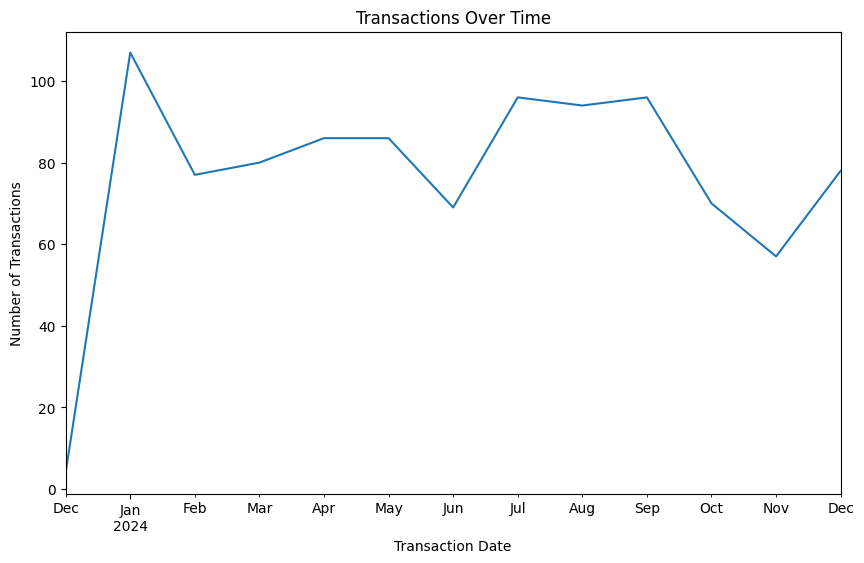

In [32]:
# Converting to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Visualizing customer signups over time
plt.figure(figsize=(10, 6))
customers.groupby(customers['SignupDate'].dt.to_period("M")).size().plot(kind='line')
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Date')
plt.ylabel('Number of Signups')
plt.show()

# Visualizing transaction volume over time
plt.figure(figsize=(10, 6))
transactions.groupby(transactions['TransactionDate'].dt.to_period("M")).size().plot(kind='line')
plt.title('Transactions Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.show()
